In [70]:
import medmnist
from medmnist import INFO, Evaluator
import numpy as np
from matplotlib import pyplot as plt
import os 


In [35]:
data = np.load("breastmnist.npz", allow_pickle=True)
lst = data.files
for item in lst:
    print(item)
    print(data[item])


train_images
[[[139 139 138 ... 165 162 165]
  [ 84  92  94 ... 124 116 112]
  [ 84  82  87 ... 124 127 126]
  ...
  [ 63  70  83 ...  36  34  32]
  [ 59  70  73 ...  50  40  34]
  [ 62  65  61 ...  51  42  40]]

 [[ 82  85  83 ...  76  83  86]
  [ 80  82  68 ...  59  61  64]
  [ 56  59  60 ...  59  58  60]
  ...
  [ 24  23  19 ...  18  18  17]
  [ 23  21  16 ...  24  23  19]
  [ 22  24  18 ...  26  22  19]]

 [[157 155 151 ... 130 128 131]
  [160 162 156 ... 126 126 135]
  [129 119 122 ... 114 110 110]
  ...
  [ 67  66  63 ...  77  75  71]
  [ 74  70  72 ...  80  82  76]
  [ 85  81  73 ...  77  79  72]]

 ...

 [[159 160 167 ... 134 136 143]
  [144 147 144 ... 123 128 143]
  [120 129 140 ... 119 101  99]
  ...
  [ 54  55  53 ...  52  44  40]
  [ 50  53  51 ...  43  46  51]
  [ 57  52  51 ...  50  55  56]]

 [[ 55  57  61 ...  59  62  64]
  [ 63  72  78 ...  68  70  71]
  [ 51  50  64 ...  61  50  57]
  ...
  [ 12  12  13 ...  19  19  19]
  [ 13  12  14 ...  17  18  18]
  [ 12  12  15 

In [36]:
lst

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [66]:
x_train, y_train = data["train_images"], data["train_labels"]
x_val, y_val = data["val_images"], data["val_labels"]
x_test, y_test = data["test_images"], data["test_labels"]

x_train = x_train.reshape(-1, 28**2)
x_val = x_val.reshape(-1, 28**2)
x_test = x_test.reshape(-1, 28**2)

y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

x_train_val = np.concatenate((x_train, x_val))
y_train_val = np.concatenate((y_train, y_val))

In [38]:
print(f"Tamanho do conjunto de treino: {len(x_train)}")
print(f"Tamanho do conjunto de validação: {len(x_val)}")
print(f"Tamanho do conjunto de teste: {len(x_test)}")

Tamanho do conjunto de treino: 546
Tamanho do conjunto de validação: 78
Tamanho do conjunto de teste: 156


Dimensões de uma imagem do dataset: (28, 28)


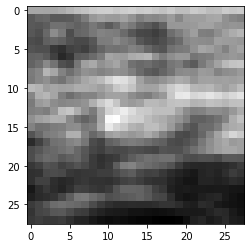

In [39]:
# Plotando um exemplo de imagem do conjunto de treino
img_example = x_train[0].reshape(28,28)
plt.imshow(img_example, cmap="gray")
print(f"Dimensões de uma imagem do dataset: {img_example.shape}")

# Balanceamento do conjunto de treino

In [40]:
possible_classes = np.unique(y_train)
p_class = len(y_train[y_train == 1])
n_class = len(y_train[y_train == 0])

print(f"Possíveis {possible_classes}")
print(f"Classes positivas: {p_class} ({p_class/len(y_train) *100 } %)")
print(f"Classes negativas: {n_class} ({n_class/len(y_train) *100 } %)")
print("O dataset está DESBALANCEADO")

Possíveis [0 1]
Classes positivas: 399 (73.07692307692307 %)
Classes negativas: 147 (26.923076923076923 %)
O dataset está DESBALANCEADO


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


model = LogisticRegression(max_iter=5000, class_weight="balanced")
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_val, y_val))
print(model.score(x_test, y_test))



1.0
0.8717948717948718
0.7756410256410257


In [74]:
from sklearn.model_selection import GridSearchCV

solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalties = ["none", "l1", "l2", "elasticnet"]
c_values = np.logspace(-4, 4, 10)
lr_grid = dict(solver=solvers, penalty=penalties, C=c_values)
lr_model = LogisticRegression(max_iter=5000, class_weight="balanced")

lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_grid, n_jobs=os.cpu_count(), cv=5, verbose=3)
lr_grid_result = lr_grid_search.fit(x_train_val, y_train_val)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s
[CV 1/5] END C=0.0001, penalty=none, solver=lbfgs;, score=0.744 total time=   0.2s
[CV 4/5] END C=0.0001, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s
[CV 2/5] END C=0.0001, penalty=none, solver=lbfgs;, score=0.768 total time=   0.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/pyth

[CV 1/5] END C=0.0001, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, penalty=none, solver=newton-cg;, score=0.768 total time=   0.6s
[CV 4/5] END C=0.0001, penalty=none, solver=newton-cg;, score=0.752 total time=   0.5s
[CV 3/5] END C=0.0001, penalty=none, solver=lbfgs;, score=0.792 total time=   0.4s
[CV 5/5] END C=0.0001, penalty=none, solver=lbfgs;, score=0.774 total time=   0.2s
[CV 3/5] END C=0.0001, penalty=none, solver=newton-cg;, score=0.800 total time=   0.6s
[CV 5/5] END C=0.0001, penalty=none, solver=newton-cg;, score=0.790 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, penalty=none, solver=sag;, score=0.798 total time=  15.9s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, penalty=none, solver=sag;, score=0.760 total time=  16.8s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, penalty=none, solver=sag;, score=0.760 total time=  17.4s
[CV 1/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.264 total time=   0.0s
[CV 2/5] END C

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.000774263682681127, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.000774263682681127, penalty=none, solver=newton-cg;, score=0.768 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.000774263682681127, penalty=none, solver=newton-cg;, score=0.800 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.000774263682681127, penalty=none, solver=newton-cg;, score=0.752 total time=   0.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.000774263682681127, penalty=none, solver=newton-cg;, score=0.790 total time=   0.4s
[CV 1/5] END C=0.000774263682681127, penalty=none, solver=lbfgs;, score=0.744 total time=   0.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.000774263682681127, penalty=none, solver=lbfgs;, score=0.768 total time=   0.1s
[CV 3/5] END C=0.000774263682681127, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 4/5] END C=0.000774263682681127, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.000774263682681127, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 1/5] END C=0.000774263682681127, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.000774263682681127, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.000774263682681127, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.000774263682681127, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.000774263682681127, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=0.0001, penalty=l2, solver=saga;, score=0.760 total time=   9.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .C=0.0001, penalty=l2, solver=saga;, score=0.790 total time=   7.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=0.0001, penalty=l2, solver=saga;, score=0.728 total time=   9.4s
[CV 4/5] END .C=0.0001, penalty=l2, solver=saga;, score=0.784 total time=   9.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=0.0001, penalty=l2, solver=saga;, score=0.768 total time=  10.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, penalty=none, solver=saga;, score=0.768 total time=  21.9s
[CV 2/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.000774263682681127, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.000774263682681127, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.000774263682681127, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.000774263682681127, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.000774263682681127, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.000774263682681127, penalty=l1, solver=liblinear

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.000774263682681127, penalty=none, solver=saga;, score=0.798 total time=  21.3s
[CV 1/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.000774263682681127, penalty=l2, solver=newton-cg;, score=0.760 total time=   0.9s
[CV 1/5] END C=0.000774263682681127, penalty=none, solver=saga;, score=0.760 total time=  23.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.000774263682681127, penalty=l2, solver=newton-cg;, score=0.760 total time=   0.6s
[CV 3/5] END C=0.000774263682681127, penalty=l2, solver=newton-cg;, score=0.792 total time=   1.1s
[CV 3/5] END C=0.000774263682681127, penalty=none, solver=saga;, score=0.784 total time=  25.9s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.000774263682681127, penalty=l2, solver=newton-cg;, score=0.760 total time=   1.7s
[CV 5/5] END C=0.000774263682681127, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.7s
[CV 1/5] END C=0.000774263682681127, penalty=l2, solver=lbfgs;, score=0.760 total time=   0.6s
[CV 4/5] END C=0.000774263682681127, penalty=l1, solver=saga;, score=0.640 total time=  14.6s
[CV 2/5] END C=0.000774263682681127, penalty=l2, solver=lbfgs;, score=0.752 total time=   0.8s
[CV 3/5] END C=0.000774263682681127, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.7s
[CV 5/5] END C=0.000774263682681127, penalty=l1, solver=saga;, score=0.726 total time=  12.5s
[CV 4/5] END C=0.000774263682681127, penalty=l2, solver=lbfgs;, score=0.760 total time=   0.8s
[CV 5/5] END C=0.000774263682681127, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.8s
[CV 1/5] END C=0.000774263682681127, penalty=l2, solver=liblinear;, score=0.760 total time=   0.5s
[CV 2/5] END C=0.000774263682681127, pen

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.005994842503189409, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s
[CV 2/5] END C=0.000774263682681127, penalty=none, solver=saga;, score=0.776 total time=  24.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.005994842503189409, penalty=none, solver=newton-cg;, score=0.768 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.005994842503189409, penalty=none, solver=newton-cg;, score=0.800 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.005994842503189409, penalty=none, solver=newton-cg;, score=0.752 total time=   0.6s
[CV 1/5] END C=0.005994842503189409, penalty=none, solver=lbfgs;, score=0.744 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.000774263682681127, penalty=none, solver=saga;, score=0.768 total time=  22.4s
[CV 2/5] END C=0.005994842503189409, penalty=none, solver=lbfgs;, score=0.768 total time=   0.1s
[CV 3/5] END C=0.005994842503189409, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 4/5] END C=0.005994842503189409, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.005994842503189409, penalty=none, solver=newton-cg;, score=0.790 total time=   0.7s
[CV 1/5] END C=0.005994842503189409, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.005994842503189409, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.005994842503189409, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.005994842503189409, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.000774263682681127, penalty=l2, solver=saga;, score=0.776 total time=  17.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.000774263682681127, penalty=l2, solver=saga;, score=0.798 total time=  15.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.000774263682681127, penalty=l2, solver=saga;, score=0.776 total time=  18.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.000774263682681127, penalty=l2, solver=saga;, score=0.768 total time=  19.5s
[CV 1/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty=l1, 

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.005994842503189409, penalty=none, solver=sag;, score=0.760 total time=  20.7s
[CV 2/5] END C=0.005994842503189409, penalty=none, solver=sag;, score=0.776 total time=  21.8s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.005994842503189409, penalty=none, solver=saga;, score=0.760 total time=  25.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.005994842503189409, penalty=none, solver=saga;, score=0.798 total time=  25.0s
[CV 3/5] END C=0.005994842503189409, penalty=none, solver=saga;, score=0.784 total time=  27.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.005994842503189409, penalty=none, solver=sag;, score=0.798 total time=  18.7s
[CV 3/5] END C=0.005994842503189409, penalty=none, solver=sag;, score=0.776 total time=  21.1s
[CV 1/5] END C=0.005994842503189409, penalty=l2, solver=newton-cg;, score=0.744 total time=   1.3s
[CV 3/5] END C=0.005994842503189409, penalty=l1, solver=saga;, score=0.736 total time=  23.6s
[CV 2/5] END C=0.005994842503189409, penalty=l2, solver=newton-cg;, score=0.744 total time=   1.1s
[CV 2/5] END C=0.005994842503189409, penalty=l1, solver=saga;, score=0.760 total time=  31.2s
[CV 3/5] END C=0.005994842503189409, penalty=l2, solver=newton-cg;, score=0.792 total time=   2.3s
[CV 1/5] END C=0.005994842503189409, penalty=l2, solver=lbfgs;, score=0.752 total time=   0.8s
[CV 4/5] END C=0.005994842503189409, penalty=l2, solver=newton-cg;, score=0.752 total time=   2.5s
[CV 5/5] END C=0.005994842503189409, penalty=l2, solver=newton-cg;, score=0.798 total time=   1.8s
[CV 2/5] END C=0.005994842503189

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.046415888336127774, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.046415888336127774, penalty=none, solver=newton-cg;, score=0.768 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.046415888336127774, penalty=none, solver=newton-cg;, score=0.800 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.046415888336127774, penalty=none, solver=newton-cg;, score=0.752 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.046415888336127774, penalty=none, solver=newton-cg;, score=0.790 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.046415888336127774, penalty=none, solver=lbfgs;, score=0.744 total time=   0.2s
[CV 2/5] END C=0.046415888336127774, penalty=none, solver=lbfgs;, score=0.768 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.046415888336127774, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 4/5] END C=0.005994842503189409, penalty=l2, solver=sag;, score=0.760 total time=  20.7s
[CV 4/5] END C=0.046415888336127774, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.046415888336127774, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 2/5] END C=0.046415888336127774, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty=l2, solver=sag;, score=0.798 total time=  19.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.005994842503189409, penalty=l2, solver=saga;, score=0.760 total time=  24.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.005994842503189409, penalty=l2, solver=saga;, score=0.776 total time=  26.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.005994842503189409, penalty=l2, solver=saga;, score=0.806 total time=  20.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.005994842503189409, penalty=l2, solver=saga;, score=0.768 total time=  22.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.046415888336127774, penalty=none, solver=sag;, score=0.760 total time=  19.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.005994842503189409, penalty=l2, solver=saga;, score=0.784 total time=  24.4s
[CV 2/5] END C=0.046415888336127774, penalty=none, solver=sag;, score=0.776 total time=  19.8s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.046415888336127774, penalty=none, solver=sag;, score=0.784 total time=  19.9s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1,

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.3593813663804626, penalty=none, solver=newton-cg;, score=0.752 total time=   0.5s
[CV 2/5] END C=0.3593813663804626, penalty=none, solver=newton-cg;, score=0.768 total time=   0.4s
[CV 3/5] END C=0.3593813663804626, penalty=none, solver=newton-cg;, score=0.800 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.3593813663804626, penalty=none, solver=lbfgs;, score=0.744 total time=   0.1s
[CV 2/5] END C=0.3593813663804626, penalty=none, solver=lbfgs;, score=0.768 total time=   0.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.3593813663804626, penalty=none, solver=newton-cg;, score=0.790 total time=   0.5s
[CV 3/5] END C=0.3593813663804626, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 4/5] END C=0.3593813663804626, penalty=none, solver=newton-cg;, score=0.752 total time=   0.6s
[CV 1/5] END C=0.3593813663804626, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s
[CV 3/5] END C=0.3593813663804626, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.046415888336127774, penalty=l2, solver=saga;, score=0.760 total time=  20.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.046415888336127774, penalty=l2, solver=saga;, score=0.776 total time=  23.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.046415888336127774, penalty=l2, solver=saga;, score=0.798 total time=  20.3s
[CV 4/5] END C=0.046415888336127774, penalty=l2, solver=saga;, score=0.768 total time=  22.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.3593813663804626, penalty=none, solver=sag;, score=0.760 total time=  18.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.3593813663804626, penalty=none, solver=sag;, score=0.776 total time=  18.8s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.3593813663804626, penalty=none, solver=sag;, score=0.776 total time=  19.3s
[CV 3/5] END C=0.046415888336127774, penalty=l2, solver=saga;, score=0.784 total time=  24.0s
[CV 1/5] END C=0.3593813663804626, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, sco

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.3593813663804626, penalty=none, solver=sag;, score=0.760 total time=  17.9s
[CV 1/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.776 total time=   4.2s
[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.736 total time=   4.7s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.816 total time=   3.7s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.768 total time=   3.5s
[CV 1/5] END C=0.3593813663804626, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.782559402207126, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.782559402207126, penalty=none, solver=newton-cg;, score=0.768 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.782559402207126, penalty=none, solver=newton-cg;, score=0.800 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.782559402207126, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.782559402207126, penalty=none, solver=newton-cg;, score=0.790 total time=   0.4s
[CV 1/5] END C=2.782559402207126, penalty=none, solver=lbfgs;, score=0.744 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.782559402207126, penalty=none, solver=lbfgs;, score=0.768 total time=   0.1s
[CV 3/5] END C=2.782559402207126, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.782559402207126, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s
[CV 5/5] END C=2.782559402207126, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 1/5] END C=2.782559402207126, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.3593813663804626, penalty=l2, solver=sag;, score=0.760 total time=  17.0s
[CV 5/5] END C=0.3593813663804626, penalty=l2, solver=sag;, score=0.798 total time=  16.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.3593813663804626, penalty=l2, solver=saga;, score=0.760 total time=  20.8s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.3593813663804626, penalty=l2, solver=saga;, score=0.776 total time=  22.9s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.3593813663804626, penalty=l2, solver=saga;, score=0.784 total time=  23.9s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.3593813663804626, penalty=l2, solver=saga;, score=0.798 total time=  20.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.782559402207126, penalty=none, solver=sag;, score=0.760 total time=  18.1s
[CV 4/5] END C=0.3593813663804626, penalty=l2, solver=saga;, score=0.768 total time=  22.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.782559402207126, penalty=none, solver=sag;, score=0.776 total time=  18.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.782559402207126, penalty=none, solver=sag;, score=0.776 total time=  18.7s
[CV 1/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total t

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=21.54434690031882, penalty=none, solver=newton-cg;, score=0.752 total time=   0.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=21.54434690031882, penalty=none, solver=newton-cg;, score=0.768 total time=   0.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=21.54434690031882, penalty=none, solver=newton-cg;, score=0.800 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=21.54434690031882, penalty=none, solver=newton-cg;, score=0.752 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=21.54434690031882, penalty=none, solver=newton-cg;, score=0.790 total time=   0.6s
[CV 1/5] END C=21.54434690031882, penalty=none, solver=lbfgs;, score=0.744 total time=   0.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=21.54434690031882, penalty=none, solver=lbfgs;, score=0.768 total time=   0.3s
[CV 3/5] END C=21.54434690031882, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=21.54434690031882, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s
[CV 5/5] END C=21.54434690031882, penalty=none, solver=lbfgs;, score=0.774 total time=   0.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=21.54434690031882, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.782559402207126, penalty=l2, solver=sag;, score=0.760 total time=  19.8s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.782559402207126, penalty=l2, solver=sag;, score=0.798 total time=  19.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.782559402207126, penalty=l2, solver=saga;, score=0.760 total time=  24.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.782559402207126, penalty=l2, solver=saga;, score=0.776 total time=  27.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.782559402207126, penalty=l2, solver=saga;, score=0.768 total time=  25.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.782559402207126, penalty=l2, solver=saga;, score=0.784 total time=  27.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.782559402207126, penalty=l2, solver=saga;, score=0.798 total time=  24.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=21.54434690031882, penalty=none, solver=sag;, score=0.760 total time=  21.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=21.54434690031882, penalty=none, solver=sag;, score=0.776 total time=  19.9s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=21.54434690031882, penalty=none, solver=sag;, score=0.776 total time=  20.3s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total t

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=166.81005372000558, penalty=none, solver=newton-cg;, score=0.752 total time=   0.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=166.81005372000558, penalty=none, solver=newton-cg;, score=0.768 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=166.81005372000558, penalty=none, solver=newton-cg;, score=0.800 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=166.81005372000558, penalty=none, solver=newton-cg;, score=0.752 total time=   0.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=166.81005372000558, penalty=none, solver=newton-cg;, score=0.790 total time=   0.4s
[CV 1/5] END C=166.81005372000558, penalty=none, solver=lbfgs;, score=0.744 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=166.81005372000558, penalty=none, solver=lbfgs;, score=0.768 total time=   0.1s
[CV 3/5] END C=166.81005372000558, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=166.81005372000558, penalty=none, solver=lbfgs;, score=0.752 total time=   0.1s
[CV 5/5] END C=166.81005372000558, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 1/5] END C=166.81005372000558, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=166.81005372000558, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=166.81005372000558, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=166.81005372000558, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=166.81005372000558, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=21.54434690031882, penalty=l2, solver=sag;, score=0.798 total time=  16.7s
[CV 4/5] END C=21.54434690031882, penalty=l2, solver=sag;, score=0.760 total time=  17.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=21.54434690031882, penalty=l2, solver=saga;, score=0.760 total time=  21.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=21.54434690031882, penalty=l2, solver=saga;, score=0.776 total time=  22.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=21.54434690031882, penalty=l2, solver=saga;, score=0.798 total time=  19.8s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=21.54434690031882, penalty=l2, solver=saga;, score=0.768 total time=  20.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=21.54434690031882, penalty=l2, solver=saga;, score=0.784 total time=  22.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=166.81005372000558, penalty=none, solver=sag;, score=0.760 total time=  16.9s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=166.81005372000558, penalty=none, solver=sag;, score=0.776 total time=  18.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=166.81005372000558, penalty=none, solver=sag;, score=0.784 total time=  18.6s
[CV 1/5] END C=166.81005372000558, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=166.81005372000558, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=166.81005372000558, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=166.81005372000558, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=166.81005372000558, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1291.5496650148827, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1291.5496650148827, penalty=none, solver=newton-cg;, score=0.768 total time=   0.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1291.5496650148827, penalty=none, solver=newton-cg;, score=0.800 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1291.5496650148827, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1291.5496650148827, penalty=none, solver=newton-cg;, score=0.790 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1291.5496650148827, penalty=none, solver=lbfgs;, score=0.744 total time=   0.3s
[CV 2/5] END C=1291.5496650148827, penalty=none, solver=lbfgs;, score=0.768 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1291.5496650148827, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1291.5496650148827, penalty=none, solver=lbfgs;, score=0.752 total time=   0.3s
[CV 5/5] END C=1291.5496650148827, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 1/5] END C=1291.5496650148827, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1291.5496650148827, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1291.5496650148827, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1291.5496650148827, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1291.5496650148827, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=166.81005372000558, penalty=l2, solver=sag;, score=0.760 total time=  18.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=166.81005372000558, penalty=l2, solver=sag;, score=0.798 total time=  18.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=166.81005372000558, penalty=l2, solver=saga;, score=0.760 total time=  23.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=166.81005372000558, penalty=l2, solver=saga;, score=0.776 total time=  25.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=166.81005372000558, penalty=l2, solver=saga;, score=0.768 total time=  23.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=166.81005372000558, penalty=l2, solver=saga;, score=0.798 total time=  23.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=166.81005372000558, penalty=l2, solver=saga;, score=0.784 total time=  26.5s
[CV 1/5] END C=1291.5496650148827, penalty=none, solver=sag;, score=0.760 total time=  20.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1291.5496650148827, penalty=none, solver=sag;, score=0.776 total time=  21.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1291.5496650148827, penalty=none, solver=sag;, score=0.776 total time=  21.3s
[CV 1/5] END C=1291.5496650148827, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1291.5496650148827, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1291.5496650148827, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1291.5496650148827, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1291.5496650148827, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10000.0, penalty=none, solver=newton-cg;, score=0.752 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10000.0, penalty=none, solver=newton-cg;, score=0.768 total time=   0.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10000.0, penalty=none, solver=newton-cg;, score=0.800 total time=   0.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10000.0, penalty=none, solver=newton-cg;, score=0.752 total time=   0.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10000.0, penalty=none, solver=newton-cg;, score=0.790 total time=   0.4s
[CV 1/5] END C=10000.0, penalty=none, solver=lbfgs;, score=0.744 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10000.0, penalty=none, solver=lbfgs;, score=0.768 total time=   0.1s
[CV 3/5] END C=10000.0, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10000.0, penalty=none, solver=lbfgs;, score=0.752 total time=   0.2s
[CV 5/5] END C=10000.0, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 1/5] END C=10000.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1291.5496650148827, penalty=l2, solver=sag;, score=0.798 total time=  16.6s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1291.5496650148827, penalty=l2, solver=sag;, score=0.760 total time=  17.5s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1291.5496650148827, penalty=l2, solver=saga;, score=0.760 total time=  21.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1291.5496650148827, penalty=l2, solver=saga;, score=0.776 total time=  23.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1291.5496650148827, penalty=l2, solver=saga;, score=0.768 total time=  20.7s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1291.5496650148827, penalty=l2, solver=saga;, score=0.798 total time=  20.0s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1291.5496650148827, penalty=l2, solver=saga;, score=0.784 total time=  23.2s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10000.0, penalty=none, solver=sag;, score=0.760 total time=  17.4s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10000.0, penalty=none, solver=sag;, score=0.776 total time=  18.3s


/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10000.0, penalty=none, solver=sag;, score=0.776 total time=  18.5s
[CV 1/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.776 total time=   1.3s
[CV 2/5

/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/pdcos/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic

In [50]:
x_train * 4

array([[ 44,  44,  40, ..., 204, 168, 160],
       [ 72,  84,  76, ..., 104,  88,  76],
       [116, 108,  92, ...,  52,  60,  32],
       ...,
       [124, 128, 156, ..., 200, 220, 224],
       [220, 228, 244, ...,  56,  60,  60],
       [120, 124, 176, ...,  80,  84,  80]], dtype=uint8)

In [49]:
x_train

array([[139, 139, 138, ...,  51,  42,  40],
       [ 82,  85,  83, ...,  26,  22,  19],
       [157, 155, 151, ...,  77,  79,  72],
       ...,
       [159, 160, 167, ...,  50,  55,  56],
       [ 55,  57,  61, ...,  14,  15,  15],
       [158, 159, 172, ...,  20,  21,  20]], dtype=uint8)

In [79]:
lr_grid_result.best_params_


{'C': 0.3593813663804626, 'penalty': 'l1', 'solver': 'liblinear'}

In [80]:
lr_best_model = LogisticRegression(penalty="l1", C=0.3593813663804626, solver='liblinear')
lr_best_model.fit(x_train_val, y_train_val)
lr_best_model.score(x_test,y_test)

0.7884615384615384

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
prediction = lr_best_model.predict(x_test)
cm = confusion_matrix(prediction, y_test)
display(cm)
report = classification_report(y_test, prediction)
print(report)

array([[24, 15],
       [18, 99]])

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        42
           1       0.85      0.87      0.86       114

    accuracy                           0.79       156
   macro avg       0.73      0.72      0.72       156
weighted avg       0.78      0.79      0.79       156



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()